# Data Mining: Programming Assignment 3

Libraries Imported

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import random
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, fpmax, fpgrowth
from mlxtend.frequent_patterns import association_rules
import seaborn as sns
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from pathlib import Path
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

## Association Rule Generation from Transaction Data

Dataset Used: Grocery_Items_23.csv

In [7]:
Grocery_Items_Files = '/Users/alokkumarjha/Downloads/Grocery_Items_23.csv'
data = pd.read_csv(Grocery_Items_Files)
print(Grocery_Items_Files)

/Users/alokkumarjha/Downloads/Grocery_Items_23.csv


In [9]:
grocery_items = pd.read_csv(Grocery_Items_Files)
grocery_items.head()

,0,1,2,3,4,5,6,7,8,9,10
0,dishes,shopping bags,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,pastry,curd,bottled beer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,sausage,whipped/sour cream,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,sugar,fruit/vegetable juice,margarine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,frankfurter,cream cheese,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
grocery_items_ = grocery_items.apply(lambda row: row.dropna().to_list(), axis = 1)
grocery_items_list = grocery_items_.to_list()

In [13]:
te = TransactionEncoder()
te_ary = te.fit(grocery_items_list).transform(grocery_items_list)
df = pd.DataFrame(te_ary, columns = te.columns_)

Reference: https://rasbt.github.io/mlxtend/user_guide/frequent_patterns/association_rules/#association_rules-association-rules-generation-from-frequent-itemsets

In [15]:
frequent_itemsets = apriori(df, min_support = 0.01, use_colnames = True)
frequent_itemsets

,support,itemsets
0,0.020250,(UHT-milk)
1,0.033750,(beef)
2,0.021625,(berries)
3,0.015375,(beverages)
4,0.044000,(bottled beer)
...,...,...
63,0.010500,"(other vegetables, soda)"
64,0.015500,"(whole milk, other vegetables)"
65,0.014750,"(rolls/buns, whole milk)"
66,0.013500,"(whole milk, soda)"


In [16]:
association_rules(frequent_itemsets, metric = "confidence", min_threshold = 0.1)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(soda),(other vegetables),0.09825,0.124250,0.010500,0.106870,0.860123,-0.001708,0.980541,-0.152789
1,(other vegetables),(whole milk),0.12425,0.161875,0.015500,0.124748,0.770647,-0.004613,0.957582,-0.253640
2,(rolls/buns),(whole milk),0.11125,0.161875,0.014750,0.132584,0.819053,-0.003259,0.966232,-0.199087
3,(soda),(whole milk),0.09825,0.161875,0.013500,0.137405,0.848831,-0.002404,0.971632,-0.164923
4,(yogurt),(whole milk),0.08650,0.161875,0.011875,0.137283,0.848082,-0.002127,0.971495,-0.163945


In [22]:
filtered_rules = association_rules(itemsets, metric="confidence", min_threshold=0.1)
filtered_rules = filtered_rules[filtered_rules['support'] >= 0.01]

print(filtered_rules[['antecedents', 'consequents', 'support', 'confidence']])

           antecedents         consequents   support  confidence
11              (soda)  (other vegetables)  0.010500    0.106870
12  (other vegetables)        (whole milk)  0.015500    0.124748
17        (rolls/buns)        (whole milk)  0.014750    0.132584
22              (soda)        (whole milk)  0.013500    0.137405
24            (yogurt)        (whole milk)  0.011875    0.137283


: These rules represent associations between different items based on the specified minimum support and confidence threshold.

In [17]:
Confidence_counts = pd.DataFrame(columns=['msv', 'mct', 'counts'])

min_support_ = []
min_confidence_ = []
counts = []
for min_support in [0.001, 0.005, 0.01, 0.05]:
    for min_confidence in [0.05, 0.075, 0.1]:
        frequent_itemsets = apriori(df, min_support=min_support, use_colnames=True)
        association_rules_df = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1)
        min_support_.append(min_support)
        min_confidence_.append(min_confidence)
        counts.append(len(association_rules_df))

Confidence_counts['msv'] = min_support_
Confidence_counts['mct'] = min_confidence_
Confidence_counts['counts'] = counts
Confidence_counts

,msv,mct,counts
0,0.001,0.050,162
1,0.001,0.075,162
2,0.001,0.100,162
3,0.005,0.050,25
4,0.005,0.075,25
5,0.005,0.100,25
6,0.010,0.050,5
7,0.010,0.075,5
8,0.010,0.100,5
9,0.050,0.050,0


In [18]:
table = pd.pivot_table(Confidence_counts, values='counts', index='mct', columns='msv', fill_value=0)
table

msv,0.001,0.005,0.010,0.050
mct,,,,
0.050,162,25,5,0
0.075,162,25,5,0
0.100,162,25,5,0


<Axes: xlabel='msv', ylabel='mct'>

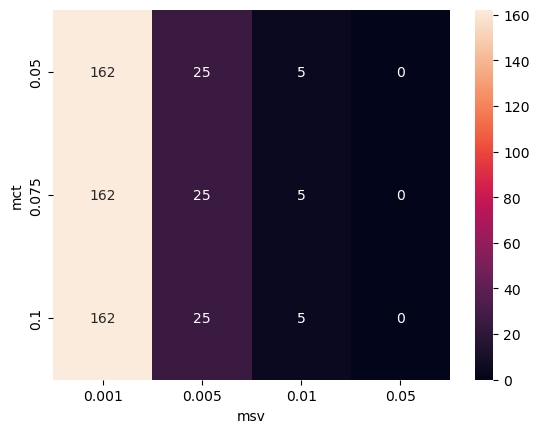

In [19]:
sns.heatmap(table, annot=True, fmt='g')

In [20]:
itemsets = apriori(df, min_support=0.005, use_colnames=True)
itemsets

,support,itemsets
0,0.020250,(UHT-milk)
1,0.008000,(baking powder)
2,0.033750,(beef)
3,0.021625,(berries)
4,0.015375,(beverages)
...,...,...
125,0.005250,"(soda, tropical fruit)"
126,0.013500,"(whole milk, soda)"
127,0.006250,"(yogurt, soda)"
128,0.009000,"(whole milk, tropical fruit)"


In [25]:
max_confidence_rule = association_rules(itemsets, metric="confidence", min_threshold=0.1)
max_confidence_rule = max_confidence_rule[max_confidence_rule['support'] >= 0.005].sort_values(by='confidence', ascending=False).head(1)

print(max_confidence_rule[['antecedents', 'consequents', 'confidence']])

      antecedents   consequents  confidence
1  (bottled beer)  (whole milk)    0.159091


The association rule with the highest confidence for a minimum support of 0.005 is:
Rule: (bottled beer) ->(whole milk)    confidence: 0.159091

# Image Classification using CNN

In [30]:
#Loading assigned dataset
dataset_path = Path("/Users/alokkumarjha/Downloads/Images")

In [31]:
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2 
)

In [32]:
train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(256, 256),  
    batch_size=20,
    class_mode='categorical',
    subset='training' 
)

Found 529 images belonging to 4 classes.


In [33]:
validation_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(256, 256),
    batch_size=20,
    class_mode='categorical',
    subset='validation' 
)

Found 130 images belonging to 4 classes.


Reference: https://www.learndatasci.com/tutorials/convolutional-neural-networks-image-classification/

In [34]:
# Convolutional Layer with 8 3 × 3 filters, max pooling with 2 × 2 pool size.

model = Sequential()
model.add(Conv2D(8, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Dense(4, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [35]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=20,  
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)

Epoch 1/20
26/26 [==============================] - 12s 420ms/step - loss: 2.2547 - accuracy: 0.2770 - val_loss: 1.3862 - val_accuracy: 0.2583
Epoch 2/20
26/26 [==============================] - 10s 369ms/step - loss: 1.3860 - accuracy: 0.2692 - val_loss: 1.3860 - val_accuracy: 0.2583
Epoch 3/20
26/26 [==============================] - 9s 332ms/step - loss: 1.3858 - accuracy: 0.2633 - val_loss: 1.3852 - val_accuracy: 0.2667
Epoch 4/20
26/26 [==============================] - 9s 347ms/step - loss: 1.3852 - accuracy: 0.2750 - val_loss: 1.3856 - val_accuracy: 0.2833
Epoch 5/20
26/26 [==============================] - 10s 367ms/step - loss: 1.3852 - accuracy: 0.2672 - val_loss: 1.3852 - val_accuracy: 0.2667
Epoch 6/20
26/26 [==============================] - 9s 352ms/step - loss: 1.3848 - accuracy: 0.2711 - val_loss: 1.3836 - val_accuracy: 0.2750
Epoch 7/20
26/26 [==============================] - 10s 371ms/step - loss: 1.3850 - accuracy: 0.2672 - val_loss: 1.3849 - val_accuracy: 0.2667
Ep

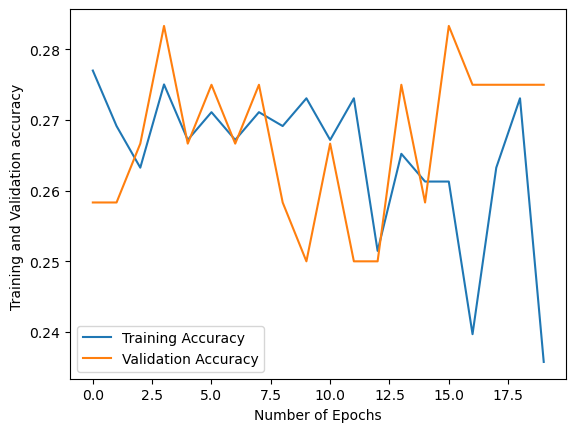

In [36]:
plt.plot(history.history["accuracy"], label="Training Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Number of Epochs")
plt.ylabel("Training and Validation accuracy ")
plt.legend()
plt.show()

In [37]:
score = model.evaluate(validation_generator, verbose=0)
print("Model - Validation Loss:", score[0])
print("Model - Validation Accuracy:", score[1])

Model - Validation Loss: 1.383488655090332
Model - Validation Accuracy: 0.26923078298568726


In [38]:
Banner_id = '916462010'
print('Banner id: ', Banner_id)

Banner id:  916462010


Banner id last digit is 0. So, Training the CNN using 2 other filter sizes: 5 × 5 and 7 × 7 for the convolution layer with all other parameters unchanged.

In [39]:
#CNN using filter sizes: 5 × 5 

model_5x5 = Sequential()
model_5x5.add(Conv2D(8, (5, 5), activation='relu', input_shape=(256, 256, 3)))
model_5x5.add(MaxPooling2D((2, 2)))
model_5x5.add(Flatten())
model_5x5.add(Dense(16, activation='relu'))
model_5x5.add(Dense(4, activation='softmax'))

model_5x5.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [40]:
history_5x5 = model_5x5.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)

Epoch 1/20
26/26 [==============================] - 17s 628ms/step - loss: 2.1277 - accuracy: 0.2731 - val_loss: 1.4004 - val_accuracy: 0.2833
Epoch 2/20
26/26 [==============================] - 15s 588ms/step - loss: 1.3315 - accuracy: 0.3870 - val_loss: 1.3789 - val_accuracy: 0.2167
Epoch 3/20
26/26 [==============================] - 16s 606ms/step - loss: 1.1458 - accuracy: 0.6012 - val_loss: 1.4664 - val_accuracy: 0.3083
Epoch 4/20
26/26 [==============================] - 17s 629ms/step - loss: 0.8025 - accuracy: 0.7878 - val_loss: 1.4682 - val_accuracy: 0.3167
Epoch 5/20
26/26 [==============================] - 16s 606ms/step - loss: 0.4076 - accuracy: 0.9234 - val_loss: 1.5656 - val_accuracy: 0.4083
Epoch 6/20
26/26 [==============================] - 18s 679ms/step - loss: 0.1597 - accuracy: 0.9882 - val_loss: 1.4571 - val_accuracy: 0.4500
Epoch 7/20
26/26 [==============================] - 15s 592ms/step - loss: 0.0682 - accuracy: 1.0000 - val_loss: 1.6827 - val_accuracy: 0.4167

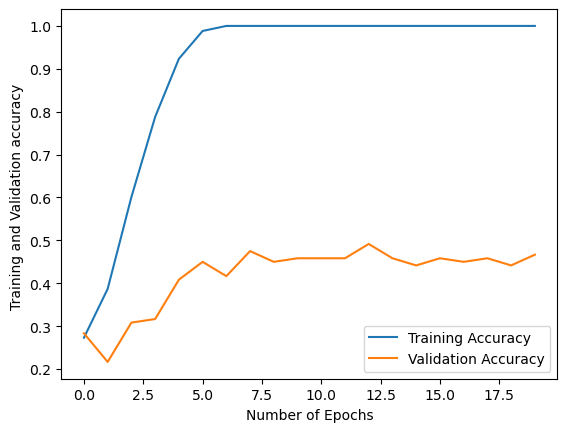

In [41]:
plt.plot(history_5x5.history["accuracy"], label="Training Accuracy")
plt.plot(history_5x5.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Number of Epochs")
plt.ylabel("Training and Validation accuracy ")
plt.legend()
plt.show()

In [42]:
score_5x5 = model_5x5.evaluate(validation_generator, verbose=0)
print("Filter Size 5x5 Model - Validation Loss:", score_5x5[0])
print("Filter Size 5x5 Model - Validation Accuracy:", score_5x5[1])

Filter Size 5x5 Model - Validation Loss: 1.7159208059310913
Filter Size 5x5 Model - Validation Accuracy: 0.48461538553237915


In [43]:
#CNN using filter sizes: 7 × 7
model_7x7 = Sequential()
model_7x7.add(Conv2D(8, (7, 7), activation='relu', input_shape=(256, 256, 3)))
model_7x7.add(MaxPooling2D((2, 2)))
model_7x7.add(Flatten())
model_7x7.add(Dense(16, activation='relu'))
model_7x7.add(Dense(4, activation='softmax'))

model_7x7.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [44]:
history_7x7 = model_7x7.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)

Epoch 1/20
26/26 [==============================] - 31s 1s/step - loss: 2.6719 - accuracy: 0.2515 - val_loss: 1.3860 - val_accuracy: 0.2750
Epoch 2/20
26/26 [==============================] - 29s 1s/step - loss: 1.3860 - accuracy: 0.2711 - val_loss: 1.3860 - val_accuracy: 0.2583
Epoch 3/20
26/26 [==============================] - 29s 1s/step - loss: 1.3858 - accuracy: 0.2711 - val_loss: 1.3856 - val_accuracy: 0.2750
Epoch 4/20
26/26 [==============================] - 29s 1s/step - loss: 1.3855 - accuracy: 0.2672 - val_loss: 1.3854 - val_accuracy: 0.2750
Epoch 5/20
26/26 [==============================] - 30s 1s/step - loss: 1.3854 - accuracy: 0.2672 - val_loss: 1.3849 - val_accuracy: 0.2750
Epoch 6/20
26/26 [==============================] - 30s 1s/step - loss: 1.3851 - accuracy: 0.2711 - val_loss: 1.3853 - val_accuracy: 0.2500
Epoch 7/20
26/26 [==============================] - 29s 1s/step - loss: 1.3848 - accuracy: 0.2711 - val_loss: 1.3837 - val_accuracy: 0.2833
Epoch 8/20
26/26 [==

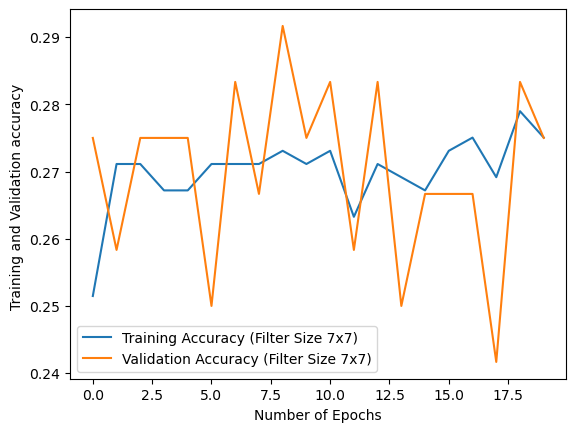

In [45]:
plt.plot(history_7x7.history["accuracy"], label="Training Accuracy (Filter Size 7x7)")
plt.plot(history_7x7.history["val_accuracy"], label="Validation Accuracy (Filter Size 7x7)")
plt.xlabel("Number of Epochs")
plt.ylabel("Training and Validation accuracy ")
plt.legend()
plt.show()

In [46]:
score_7x7 = model_7x7.evaluate(validation_generator, verbose=0)
print("Filter Size 7x7 Model - Validation Loss:", score_7x7[0])
print("Filter Size 7x7 Model - Validation Accuracy:", score_7x7[1])

Filter Size 7x7 Model - Validation Loss: 1.383507251739502
Filter Size 7x7 Model - Validation Accuracy: 0.26923078298568726


From the 3 above graph, CNN using 3 × 3 filters is underfitting, CNN using 5×5 filters is  overfitting. CNN using 7×7 filters is Good fit model as Towards the end, both training and validation accuracies have increased, and there is a small gap between them. Based on performance of the models, Validation accuracy is more for  5×5 filters (0.484). So, it is the best model.